# Unit 5 - Financial Planning

In [18]:
# Initial imports
import os
import requests
import pandas as pd
import json
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
from pathlib import Path
from datetime import date

%matplotlib inline

In [19]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [20]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [21]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [22]:
# Fetch current BTC price
# YOUR CODE HERE!
resp_btc = requests.get(btc_url)
#print(json.dumps(btc_data, indent=4))
btc_data = resp_btc.json()
btc_symbol = btc_data['data']['1']['symbol']
btc_price = btc_data['data']['1']['quotes']['USD']['price']
print(f'{btc_symbol}: {btc_price}')

# Fetch current ETH price
# YOUR CODE HERE!

resp_eth = requests.get(eth_url)
#print(json.dumps(eth_data, indent=4))
eth_data = resp_eth.json()
eth_symbol = eth_data['data']['1027']['symbol']
eth_price = eth_data['data']['1027']['quotes']['USD']['price']
print(f'{eth_symbol}: {eth_price}')

BTC: 48064.0
ETH: 3183.95


In [23]:
# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = btc_price * 1.2 
my_eth_value = eth_price * 5.3
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $57676.80
The current value of your 5.3 ETH is $16874.93


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [24]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [25]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

print(alpaca_api_key)
print(alpaca_secret_key)
# Create the Alpaca API object
# YOUR CODE HERE!
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

PK68216YLBI94T3BO0QC
NLgQOKkebagGjw98XlDKxbQ9Al7MYCSqx5x7alhf


In [26]:
# Format current date as ISO format
# YOUR CODE HERE!
start_date = pd.Timestamp("2021-08-20", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-08-20", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df
# Preview DataFrame
# YOUR CODE HERE!
df_ticker.tail()

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-08-20 00:00:00-04:00  116.18  116.21  116.08  116.15  2672679  440.23   

                                                             
                             high     low   close    volume  
time                                                         
2021-08-20 00:00:00-04:00  443.71  439.71  443.33  63120064

In [27]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = df_ticker["AGG"]["close"]
spy_close_price = df_ticker["SPY"]["close"]
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $time
2021-08-20 00:00:00-04:00    116.15
Name: close, dtype: float64
Current SPY closing price: $time
2021-08-20 00:00:00-04:00    443.33
Name: close, dtype: float64


In [28]:
# Compute the current value of shares
# YOUR CODE HERE!
my_agg_value = float(agg_close_price) * float(my_agg)
my_spy_value = float(spy_close_price) * float(my_spy)
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22166.50
The current value of your 200 AGG shares is $23230.00


### Savings Health Analysis

In [29]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000
# Consolidate financial assets data
# YOUR CODE HERE!
crypto = my_btc_value + my_eth_value
shares = my_agg_value + my_spy_value
# Create savings DataFrame
# YOUR CODE HERE!
data = [['crypto',crypto],['shares',shares]]
df_savings = pd.DataFrame(data, columns = ['asset_type', 'amount'])
# Display savings DataFrame
#display(df_savings)
df_savings.set_index('asset_type',inplace =True)
df_savings

,amount
asset_type,
crypto,74551.735
shares,45396.500


<AxesSubplot:title={'center':'Savings in Asset Class'}, ylabel='amount'>

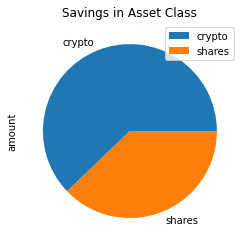

In [30]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(title="Savings in Asset Class",y='amount')

In [31]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
emergency_fund
# Calculate total amount of savings
# YOUR CODE HERE!
total_amount = crypto + shares
total_amount
# Validate saving health
# YOUR CODE HERE!
if total_amount > emergency_fund:
    print(f'Congratulation! Your savings are in good health!')
elif  total_amount == emergency_fund:
    print(f'Congratulation! Your savings are just right!')
elif total_amount < emergency_fund:
    print(f'Your funds are inadequate by {emergency_fund -total_amount}')
else:
    print(f'Error!')

Congratulation! Your savings are in good health!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [32]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp("2016-08-20", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-08-20", tz="America/New_York").isoformat()

In [33]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df
# Preview DataFrame
# YOUR CODE HERE!
df_ticker.head()

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2017-08-30 00:00:00-04:00  110.27  110.3300  110.2400  110.290  1357572.0   
2017-08-31 00:00:00-04:00  110.31  110.4600  110.3100  110.435  4179400.0   
2017-09-01 00:00:00-04:00  110.19  110.2200  109.9100  109.960  2579681.0   
2017-09-05 00:00:00-04:00  110.27  110.4972  110.2100  110.420  1922189.0   
2017-09-06 00:00:00-04:00  110.42  110.5200  110.2301  110.290  2476931.0   

                              SPY                                      
                             open    high     low   close      volume  
time                                                                   
2017-08-30 00:00:00-04:00     NaN     NaN     NaN     NaN         NaN  
2017-08-31 00:00:00-04:00  246.73  247.77  246.61  247.42  52550897.0  
2017-09-01 00:00:00-04:00  247.92  248.33  247.67  247.88  39588857.0  
2017-09-05 00:00:00-04:00  247.24  247.52  244.95  246.10  66628408.0  
2017-09-06 00:00:00-04:00  246.84  247.28  246.23  246.91  44577397.0

In [34]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_even_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = [0.4,0.6],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [35]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_even_dist.portfolio_data.head()

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2017-08-30 00:00:00-04:00  110.27  110.3300  110.2400  110.290  1357572.0   
2017-08-31 00:00:00-04:00  110.31  110.4600  110.3100  110.435  4179400.0   
2017-09-01 00:00:00-04:00  110.19  110.2200  109.9100  109.960  2579681.0   
2017-09-05 00:00:00-04:00  110.27  110.4972  110.2100  110.420  1922189.0   
2017-09-06 00:00:00-04:00  110.42  110.5200  110.2301  110.290  2476931.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-08-30 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2017-08-31 00:00:00-04:00     0.001315  246.73  247.77  246.61  247.42   
2017-09-01 00:00:00-04:00    -0.004301  247.92  248.33  247.67  247.88   
2017-09-05 00:00:00-04:00     0.004183  247.24  247.52  244.95  246.10   
2017-09-06 00:00:00-04:00    -0.001177  246.84  247.28  246.23  246.91   

                                                    
                               volume daily_return  
time                                                
2017-08-30 00:00:00-04:00         NaN          NaN  
2017-08-31 00:00:00-04:00  52550897.0          NaN  
2017-09-01 00:00:00-04:00  39588857.0     0.001859  
2017-09-05 00:00:00-04:00  66628408.0    -0.007181  
2017-09-06 00:00:00-04:00  44577397.0     0.003291

In [36]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.017022,1.010888,0.992112,1.002227,0.992412,0.993805,1.004849,1.005158,1.010220,0.989876,...,1.000827,1.011457,0.999791,0.993776,0.986622,1.000214,1.003660,0.997844,0.998626,1.000081
2,1.011060,1.016996,0.993517,0.997582,0.986169,1.000207,0.995888,0.997139,1.012843,1.003643,...,1.018736,1.009946,0.996697,0.995663,0.979654,0.994943,1.008267,0.994185,0.999338,0.993961
3,1.010329,1.028766,0.991513,0.999976,0.997509,0.995788,0.984958,0.999451,1.014312,0.990121,...,1.000437,1.002978,1.002456,0.989167,0.984586,0.983596,0.997407,0.987395,1.004532,0.970487
4,1.015442,1.018941,0.977698,1.015619,0.996465,1.002228,1.006061,1.000100,1.024709,1.006311,...,1.010605,1.012418,1.009771,0.977906,0.985489,0.972376,1.008269,0.991811,1.004964,0.966015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,25.489323,19.848680,12.800695,17.601489,10.020732,16.665774,12.167686,12.858729,40.323025,16.914754,...,11.666865,19.030132,43.559599,32.706375,15.520814,15.518171,24.005321,30.039955,23.052252,8.710090
7557,25.851966,19.867064,12.921121,17.674359,10.051107,16.503709,12.091137,12.919143,40.071775,17.031530,...,11.458586,19.257594,43.451311,32.707218,15.555205,15.613382,23.756605,29.986917,23.258942,8.832647
7558,25.842829,19.866238,12.884794,17.682417,9.948554,16.603773,12.071146,12.890372,40.206518,16.822407,...,11.419079,19.111254,43.626930,32.408143,15.581094,15.757673,23.759483,30.131808,23.444755,8.913162
7559,26.029443,19.585215,12.946442,17.584020,10.022849,16.605814,12.105687,12.812848,40.438455,16.647078,...,11.365776,18.943936,43.719922,32.196658,15.502450,15.741392,23.904552,30.450460,23.614276,8.980869


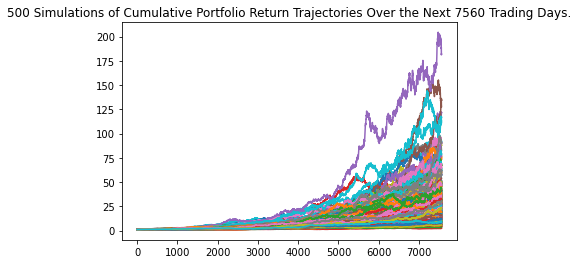

In [37]:
# Plot simulation outcomes
# YOUR CODE HERE!
att_line_plot = MC_even_dist.plot_simulation()

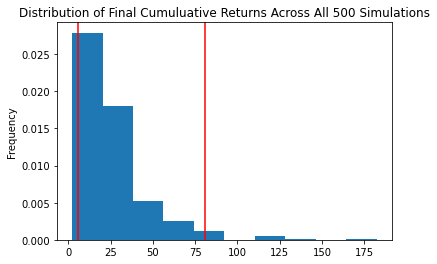

In [38]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [39]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
even_tbl = MC_even_dist.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(even_tbl)

count           500.000000
mean             26.061727
std              20.586279
min               2.256962
25%              13.389234
50%              20.087668
75%              31.848165
max             182.218828
95% CI Lower      5.952722
95% CI Upper     80.774936
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [40]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $119054.43 and $1615498.72


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [41]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $178581.65 and $2423248.08


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [42]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_even_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = [0.3,0.7],
    num_simulation = 500,
    num_trading_days = 252*5
)
MC_even_dist.portfolio_data.head()

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2017-08-30 00:00:00-04:00  110.27  110.3300  110.2400  110.290  1357572.0   
2017-08-31 00:00:00-04:00  110.31  110.4600  110.3100  110.435  4179400.0   
2017-09-01 00:00:00-04:00  110.19  110.2200  109.9100  109.960  2579681.0   
2017-09-05 00:00:00-04:00  110.27  110.4972  110.2100  110.420  1922189.0   
2017-09-06 00:00:00-04:00  110.42  110.5200  110.2301  110.290  2476931.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-08-30 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2017-08-31 00:00:00-04:00     0.001315  246.73  247.77  246.61  247.42   
2017-09-01 00:00:00-04:00    -0.004301  247.92  248.33  247.67  247.88   
2017-09-05 00:00:00-04:00     0.004183  247.24  247.52  244.95  246.10   
2017-09-06 00:00:00-04:00    -0.001177  246.84  247.28  246.23  246.91   

                                                    
                               volume daily_return  
time                                                
2017-08-30 00:00:00-04:00         NaN          NaN  
2017-08-31 00:00:00-04:00  52550897.0          NaN  
2017-09-01 00:00:00-04:00  39588857.0     0.001859  
2017-09-05 00:00:00-04:00  66628408.0    -0.007181  
2017-09-06 00:00:00-04:00  44577397.0     0.003291

In [43]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.985467,0.998828,1.010408,1.003997,1.003251,0.999364,1.008221,1.001575,0.979234,1.016580,...,1.000412,1.011520,1.003205,1.008732,0.993951,0.988906,1.009526,1.005215,1.009926,1.013144
2,1.000998,1.003481,1.007800,1.022681,1.002312,0.999294,1.003597,0.994527,0.979607,1.032381,...,1.002470,1.002166,1.014986,1.014821,1.000977,0.980041,1.005310,1.008782,1.020809,1.026328
3,0.994817,0.996925,1.001771,1.026739,1.007587,0.995564,1.014613,0.991000,0.978666,1.026878,...,1.006521,0.988936,1.007675,1.018183,0.996015,0.987727,1.004660,0.988571,1.018618,1.028362
4,0.982795,0.984297,1.006163,1.009631,1.013576,0.997878,1.022115,0.997206,0.988341,1.033774,...,1.010185,1.005066,1.026427,1.015149,1.011823,0.987299,0.989302,0.992210,1.015289,1.031286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.038999,1.049909,1.574299,1.642671,1.639718,2.030704,1.390728,1.689810,1.185983,3.122626,...,1.586245,1.537660,1.773144,2.131905,1.337290,1.150654,1.476098,1.004796,1.456537,1.116795
1257,2.037272,1.043376,1.584544,1.629460,1.626692,2.040917,1.409168,1.675742,1.189649,3.146728,...,1.590207,1.534121,1.775659,2.155704,1.334232,1.146189,1.477234,0.990833,1.449738,1.102013
1258,2.022388,1.035467,1.601633,1.623017,1.618393,2.046537,1.423385,1.685915,1.175100,3.155309,...,1.587920,1.527831,1.789429,2.163984,1.355095,1.133022,1.467517,0.995302,1.443245,1.112022
1259,2.016893,1.021004,1.580830,1.609169,1.596882,2.061183,1.439328,1.688184,1.173398,3.152862,...,1.595071,1.521808,1.798208,2.150101,1.350995,1.127150,1.464665,1.002919,1.427548,1.118060


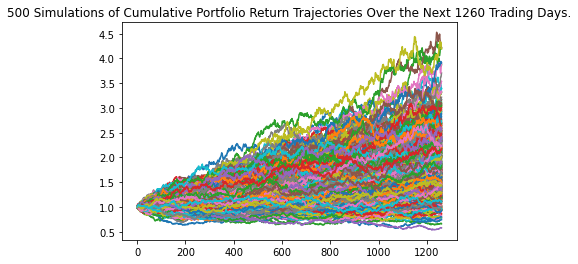

In [44]:
# Plot simulation outcomes
# YOUR CODE HERE!
att_line_plot = MC_even_dist.plot_simulation()

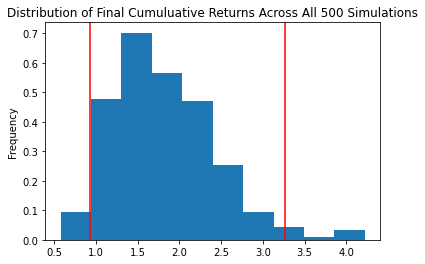

In [45]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_even_dist.plot_distribution()

In [46]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
even_tbl = MC_even_dist.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(even_tbl)

count           500.000000
mean              1.815070
std               0.616959
min               0.576694
25%               1.361663
50%               1.706942
75%               2.181520
max               4.221939
95% CI Lower      0.932443
95% CI Upper      3.265205
Name: 1260, dtype: float64


In [47]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(even_tbl[8]*initial_investment,2)
ci_upper_five = round(even_tbl[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $55946.61 and $195912.31


### Ten Years Retirement Option

In [54]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_even_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = [0.15,0.85],
    num_simulation = 500,
    num_trading_days = 252*10
)
MC_even_dist.portfolio_data.head()

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2017-08-30 00:00:00-04:00  110.27  110.3300  110.2400  110.290  1357572.0   
2017-08-31 00:00:00-04:00  110.31  110.4600  110.3100  110.435  4179400.0   
2017-09-01 00:00:00-04:00  110.19  110.2200  109.9100  109.960  2579681.0   
2017-09-05 00:00:00-04:00  110.27  110.4972  110.2100  110.420  1922189.0   
2017-09-06 00:00:00-04:00  110.42  110.5200  110.2301  110.290  2476931.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-08-30 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2017-08-31 00:00:00-04:00     0.001315  246.73  247.77  246.61  247.42   
2017-09-01 00:00:00-04:00    -0.004301  247.92  248.33  247.67  247.88   
2017-09-05 00:00:00-04:00     0.004183  247.24  247.52  244.95  246.10   
2017-09-06 00:00:00-04:00    -0.001177  246.84  247.28  246.23  246.91   

                                                    
                               volume daily_return  
time                                                
2017-08-30 00:00:00-04:00         NaN          NaN  
2017-08-31 00:00:00-04:00  52550897.0          NaN  
2017-09-01 00:00:00-04:00  39588857.0     0.001859  
2017-09-05 00:00:00-04:00  66628408.0    -0.007181  
2017-09-06 00:00:00-04:00  44577397.0     0.003291

In [55]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996803,1.009692,1.004484,0.989472,1.015493,0.987169,0.986520,1.006908,1.011313,1.009450,...,1.009165,1.007406,0.999760,0.998291,0.992706,0.991538,1.013265,1.016269,1.002212,0.991300
2,0.987232,1.007263,1.008235,0.994329,1.024171,0.987297,0.981244,1.006938,1.019138,1.018928,...,0.990469,1.016439,1.003365,1.008701,1.000217,0.994500,1.000324,1.020868,0.995280,1.000346
3,0.987886,1.013946,1.011340,0.995497,1.012071,0.970226,0.989097,1.001380,1.020401,1.006153,...,0.982179,1.029999,1.012312,1.005015,1.007659,1.006756,1.003006,1.022442,0.995539,0.992086
4,0.977690,0.996283,1.018214,0.976249,1.008281,0.961532,0.974293,0.989262,1.025895,1.001504,...,0.970464,1.023394,0.991526,1.024819,1.014665,1.012388,1.021234,1.008017,1.006386,0.999729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,4.077743,2.401249,2.282901,3.974025,2.019183,1.524133,6.348358,3.009864,3.047656,2.247375,...,4.659864,11.747510,4.781886,2.944234,5.479736,3.945632,5.575115,6.091179,4.183084,8.865226
2517,4.072852,2.424644,2.310176,3.971664,2.005654,1.508642,6.241881,3.064024,3.015552,2.194998,...,4.741833,11.618098,4.815973,2.967606,5.474130,3.950248,5.645376,6.045929,4.171622,8.818775
2518,4.013011,2.385373,2.329808,3.934779,2.023536,1.490269,6.290268,3.047821,3.047024,2.191934,...,4.720446,11.428213,4.748885,2.927901,5.381747,3.945649,5.646687,6.022316,4.100402,8.827167
2519,4.032877,2.418704,2.336372,3.943607,2.053478,1.477215,6.287147,3.030520,3.042086,2.145678,...,4.831589,11.257721,4.800545,2.940760,5.342724,3.960124,5.625558,5.997555,4.116173,8.807522


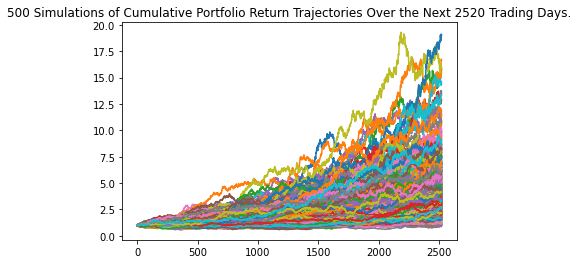

In [56]:
# Plot simulation outcomes
# YOUR CODE HERE!
att_line_plot = MC_even_dist.plot_simulation()

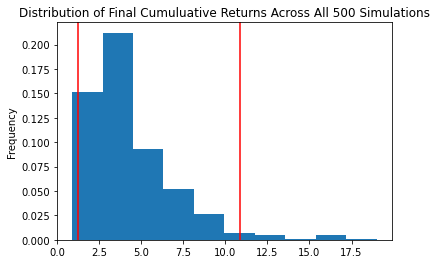

In [57]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_even_dist.plot_distribution()

In [58]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
even_tbl = MC_even_dist.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(even_tbl)

count           500.000000
mean              4.307334
std               2.578516
min               0.892383
25%               2.606556
50%               3.591467
75%               5.401656
max              18.985907
95% CI Lower      1.236178
95% CI Upper     10.876574
Name: 2520, dtype: float64


In [59]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(even_tbl[8]*initial_investment,2)
ci_upper_ten = round(even_tbl[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $74170.67 and $652594.46
